# Interpolating and Extrapolating

So - we can now generate models and solve equations, but what if we are measuring data?

First - let's talk about _interpolation_ and _extrapolation_.  

**_Interpolation_** is estimating values between recorded data points.   
**_Extrapolation_** is istimating outside the bounds of the recorded data.  

We can do both of these with python!

First let's generate some example "data" to play with. We are going to make this up, but you could use real data just as easily after loading it with - say - pandas, etc.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_x=np.linspace(0, 10, 11)
data_y=np.cos(-data_x**2/9.0)

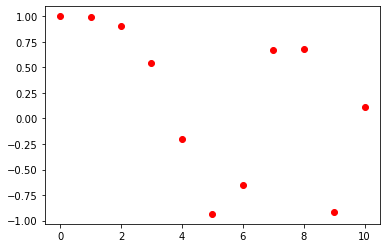

In [7]:
plt.plot(data_x, data_y, 'ro')

Now let's try to interpolate between the data points. From `scipy` yet again, we can use the `interp1d` function, which generates an "interpolation function object" - basically a function you can pass values to to see what they would be.

In [8]:
from scipy.interpolate import interp1d

In [10]:
f_linear=interp1d(data_x, data_y)

Let's make a denser set of x points so we can see how the interpolation is working.

In [11]:
dense_x=np.linspace(0, 10, 51)

Then let's apply the interpolation function

In [13]:
y_linear=f_linear(dense_x)
y_linear

array([ 1.        ,  0.9987667 ,  0.9975334 ,  0.99630011,  0.99506681,
        0.99383351,  0.97563674,  0.95743997,  0.93924321,  0.92104644,
        0.90284967,  0.8303402 ,  0.75783072,  0.68532125,  0.61281178,
        0.54030231,  0.3911405 ,  0.2419787 ,  0.09281689, -0.05634492,
       -0.20550672, -0.3513146 , -0.49712249, -0.64293037, -0.78873825,
       -0.93454613, -0.87836563, -0.82218513, -0.76600463, -0.70982412,
       -0.65364362, -0.38923492, -0.12482621,  0.13958249,  0.4039912 ,
        0.6683999 ,  0.67000091,  0.67160191,  0.67320291,  0.67480392,
        0.67640492,  0.35889788,  0.04139085, -0.27611619, -0.59362323,
       -0.91113026, -0.70584822, -0.50056618, -0.29528414, -0.09000209,
        0.11527995])

And plot!

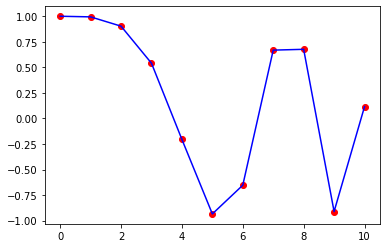

In [15]:
plt.plot(data_x, data_y, 'ro')
plt.plot(dense_x, y_linear, 'b-')

Ok - so the basic interp1d just draws a straight line between each data point, and uses that to figure out what a new y-value might be.  This is . . . useful, but one could clearly suspect that it's not accurate.  If we look at what the actual data formula would have generated:

In [16]:
dense_y=np.cos(-dense_x**2/9.0)

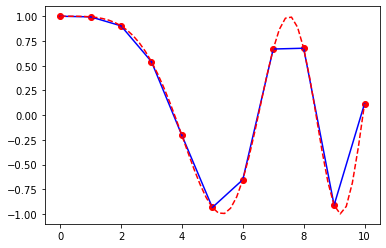

In [18]:
plt.plot(data_x, data_y, 'ro')
plt.plot(dense_x, y_linear, 'b-')
plt.plot(dense_x, dense_y, 'r--')

It's ok in certain regions, but in others is way off.  What happens if we try to _extrapolate_ or plot values outside the range of the initial data?

In [20]:
extra_x=np.linspace(-2, 12, 71)
y_linear_extra=f_linear(extra_x)

ValueError: A value in x_new is below the interpolation range.

Hmm - threw an error!  Reading the error - it says `A value in x_new is below the interpolation range.` - meaning that we tried to extrapolate.  However, there are _options_ you can set for `interp1d` that will allow the function to extrapolate.  These options are `bounds_error` and `fill_value`.

`bounds_error` controls whether this error is thrown, but if you specify it as `False` you must also specify the `fill_value`.  `fill_value` can either be the values you want to "fill" in when extrapolating as in (.5, -.5):


In [23]:
f_linear_fixed=interp1d(data_x, data_y, bounds_error=False, fill_value=(.5, -.5))
y_linear_fixed=f_linear_fixed(extra_x)

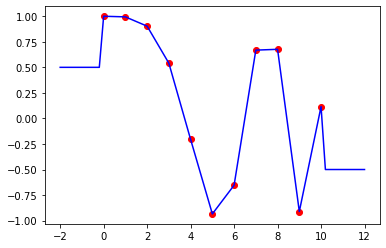

In [25]:
plt.plot(data_x, data_y, 'ro')
plt.plot(extra_x, y_linear_fixed, 'b-')

So it just uses a constant value outside the bounds of the data that was specified. The other option for `fill_value` is to say "extrapolate"

In [26]:
f_linear_extra=interp1d(data_x, data_y, bounds_error=False, fill_value="extrapolate")
y_linear_extra=f_linear_extra(extra_x)

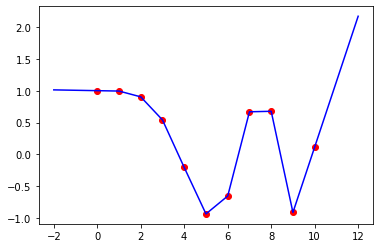

In [27]:
plt.plot(data_x, data_y, 'ro')
plt.plot(extra_x, y_linear_extra, 'b-')

So with extrapolate it just continues the line defined from the last two points.

We can also set the `kind` of interpolation we are doing - the default interpolation is "linear", but we can also do one of a couple different spline fits:

In [29]:
f_zero=interp1d(data_x, data_y, 'zero')
f_slinear=interp1d(data_x, data_y, kind='slinear')
f_cubic=interp1d(data_x, data_y, kind='cubic')

In [30]:
y_zero=f_zero(dense_x)
y_slinear=f_slinear(dense_x)
y_cubic=f_cubic(dense_x)

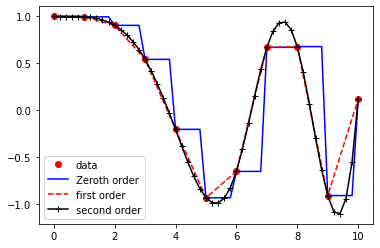

In [32]:
plt.plot(data_x, data_y, 'ro')
plt.plot(dense_x, y_zero, 'b-')
plt.plot(dense_x, y_slinear, 'r--')
plt.plot(dense_x, y_cubic, 'k-+')
plt.legend(['data', 'Zeroth order', 'first order', 'second order'])

Or we can try `nearest`, `previous` or `next`:

In [33]:
f_nearest=interp1d(data_x, data_y, 'nearest')
f_previous=interp1d(data_x, data_y, kind='previous')
f_next=interp1d(data_x, data_y, kind='next')

In [36]:
y_nearest=f_nearest(dense_x)
y_previous=f_previous(dense_x)
y_next=f_next(dense_x)

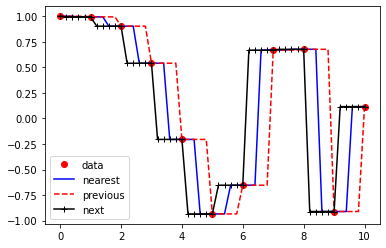

In [37]:
plt.plot(data_x, data_y, 'ro')
plt.plot(dense_x, y_nearest, 'b-')
plt.plot(dense_x, y_previous, 'r--')
plt.plot(dense_x, y_next, 'k-+')
plt.legend(['data', 'nearest', 'previous', 'next'])

## Curve fitting

So - we can intperolate between points - but what if we want to fig a curve to the whole function? 

We can use `curve_fit` from `scipy.optimize`